<a href="https://colab.research.google.com/github/ahmed123234/image_classifier-/blob/main/Image_Classifier_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications.

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below.

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [ ]:
# TODO: Make all necessary imports.
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import json
from PIL import Image


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [ ]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

print(dataset_info)



Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:01<10:32,  1.93s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<10:30,  1.93s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<10:28,  1.93s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<10:26,  1.93s/ MiB]

Dl Size...:   2%|▏         | 5/328 [00:02<10:24,  1.93s/ MiB]

Dl Si

Dl Size...:  16%|█▋        | 54/328 [00:04<00:18, 15.14 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:04<00:18, 15.14 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:04<00:17, 15.14 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:

Dl Size...:  35%|███▌      | 115/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:09, 21.85 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:09, 21.85 MiB/s]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:  39%|███▉      | 129/328 [00

Dl Size...:  54%|█████▎    | 176/328 [00:08<00:06, 24.81 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:08<00:06, 24.81 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:08<00:06, 24.81 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:08<00:06, 24.81 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:08<00:05, 24.81 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:08<00:05, 24.81 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:08<00:05, 24.81 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  56%|█████▌    | 183/328 [00:08<00:05, 25.43 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:09<00:05, 25.43 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00

Dl Size...:  72%|███████▏  | 236/328 [00:10<00:03, 25.61 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 25.61 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 25.61 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  73%|███████▎  | 239/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:11<00:03, 26.32 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00

Dl Size...:  90%|█████████ | 296/328 [00:13<00:01, 27.34 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:13<00:01, 27.34 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:13<00:01, 27.34 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:13<00:01, 27.34 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:13<00:01, 27.34 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:13<00:00, 27.34 MiB/s]

Dl Size...:  95%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.70 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [00:23<00:00,  5.11s/ url]e/s]
IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)


Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.70 MiB/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
Note

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.70 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [00:54<00:00,  5.11s/ url], 294.14 file/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.70 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Extraction completed...:  98%|█████████▊| 8040/8189 [01:04<00:00, 398.68 file/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.70 MiB/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]
                                                                             
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteTA7194/oxford_flowers102-train.tfrecord*...:   0%|          | 0/1020 [00:00<?, ? examples/s]
Generating test examples...:  78%|███████▊  | 4788/6149 [00:01<00:00, 4786.88 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteTA7194/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteTA7194/oxford_flowers102-test.tfrecord*...:  23%|██▎       | 1429/6149 [00:00<00:00, 14275.89 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incomp

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more 

2025-11-05 20:19:33.455479: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


In [ ]:
# TODO: Create a training set, a validation set and a test set.

training_set = dataset['train']
validation_set = dataset['validation']
test_set = dataset['test']

## Explore the Dataset

In [ ]:
# TODO: Get the number of examples in each set from the dataset info.
num_training_examples = dataset_info.splits['train'].num_examples
num_validation_examples = dataset_info.splits['validation'].num_examples
num_test_examples = dataset_info.splits['test'].num_examples

print('Total Number of Training Examples: {}'.format(num_training_examples))
print('Total Number of Validation Examples: {}'.format(num_validation_examples))
print('Total Number of Test Examples: {}'.format(num_test_examples))

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes

print('Total Number of Classes: {}'.format(num_classes))


Total Number of Training Examples: 1020
Total Number of Validation Examples: 1020
Total Number of Test Examples: 6149
Total Number of Classes: 102


In [ ]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for i, (image, label) in enumerate(training_set.take(3)):
    print(
        'Image {} Shape: {}'.format(i+1, image.shape),
        'Image {} Label: {}'.format(i+1, label.numpy())
    )


Image 1 Shape: (500, 667, 3) Image 1 Label: 72
Image 2 Shape: (500, 666, 3) Image 2 Label: 84
Image 3 Shape: (670, 500, 3) Image 3 Label: 70


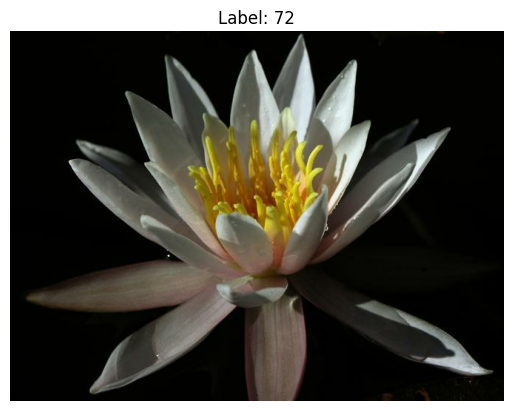

In [ ]:
# TODO: Plot 1 image from the training set. Set the title
# of the plot to the corresponding image label.
for image, label in training_set.take(1):
    plt.imshow(image)
    plt.title("Label: {}".format(label.numpy()))
    plt.axis('off')
    plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [ ]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

In [ ]:
class_names

{'0': 'pink primrose',
 '1': 'hard-leaved pocket orchid',
 '2': 'canterbury bells',
 '3': 'sweet pea',
 '4': 'english marigold',
 '5': 'tiger lily',
 '6': 'moon orchid',
 '7': 'bird of paradise',
 '8': 'monkshood',
 '9': 'globe thistle',
 '10': 'snapdragon',
 '11': "colt's foot",
 '12': 'king protea',
 '13': 'spear thistle',
 '14': 'yellow iris',
 '15': 'globe-flower',
 '16': 'purple coneflower',
 '17': 'peruvian lily',
 '18': 'balloon flower',
 '19': 'giant white arum lily',
 '20': 'fire lily',
 '21': 'pincushion flower',
 '22': 'fritillary',
 '23': 'red ginger',
 '24': 'grape hyacinth',
 '25': 'corn poppy',
 '26': 'prince of wales feathers',
 '27': 'stemless gentian',
 '28': 'artichoke',
 '29': 'sweet william',
 '30': 'carnation',
 '31': 'garden phlox',
 '32': 'love in the mist',
 '33': 'mexican aster',
 '34': 'alpine sea holly',
 '35': 'ruby-lipped cattleya',
 '36': 'cape flower',
 '37': 'great masterwort',
 '38': 'siam tulip',
 '39': 'lenten rose',
 '40': 'barbeton daisy',
 '41': '

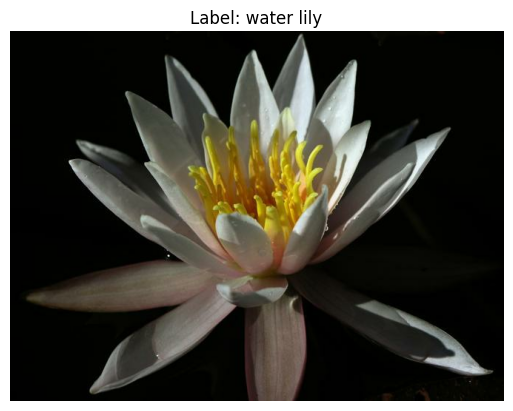

In [ ]:
# TODO: Plot 1 image from the training set. Set the title
# of the plot to the corresponding class name.
for image, label in training_set.take(1):
    plt.imshow(image)
    plt.title("Label: {}".format(class_names[str(label.numpy())]))
    plt.axis('off')
    plt.show()

## Create Pipeline

In [ ]:
# TODO: Create a pipeline for each set.
IMG_SIZE = 224
BATCH_SIZE= 32
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image /= 255.
    return image, label

training_set = training_set.map(preprocess_image).batch(BATCH_SIZE).prefetch(1)
validation_set = validation_set.map(preprocess_image).batch(BATCH_SIZE).prefetch(1)
test_set = test_set.map(preprocess_image).batch(BATCH_SIZE).prefetch(1)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students!

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model.

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# TODO: Build and train your network.
# Load the MobileNet pre-trained network from TensorFlow Hub.
URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

feature_extractor = hub.KerasLayer(URL, input_shape=(IMG_SIZE, IMG_SIZE, 3))

feature_extractor.trainable = False


In [ ]:
# build the model
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
EPOCHS = 10

# train the model
history = model.fit(training_set,
                   epochs=EPOCHS,
                   validation_data=validation_set)

Epoch 1/10
32/32 [==============================] - 66s 2s/step - loss: 4.3213 - accuracy: 0.1265 - val_loss: 3.1244 - val_accuracy: 0.3863
Epoch 2/10
32/32 [==============================] - 60s 2s/step - loss: 2.1370 - accuracy: 0.6745 - val_loss: 2.0159 - val_accuracy: 0.6520
Epoch 3/10
32/32 [==============================] - 60s 2s/step - loss: 1.1287 - accuracy: 0.8902 - val_loss: 1.5353 - val_accuracy: 0.7304
Epoch 4/10
32/32 [==============================] - 58s 2s/step - loss: 0.6819 - accuracy: 0.9529 - val_loss: 1.2951 - val_accuracy: 0.7735
Epoch 5/10
32/32 [==============================] - 58s 2s/step - loss: 0.4504 - accuracy: 0.9843 - val_loss: 1.1579 - val_accuracy: 0.7882
Epoch 6/10
32/32 [==============================] - 57s 2s/step - loss: 0.3191 - accuracy: 0.9951 - val_loss: 1.0693 - val_accuracy: 0.7961
Epoch 7/10
32/32 [==============================] - 58s 2s/step - loss: 0.2379 - accuracy: 0.9990 - val_loss: 1.0075 - val_accuracy: 0.8088
Epoch 8/10
32/32 [==

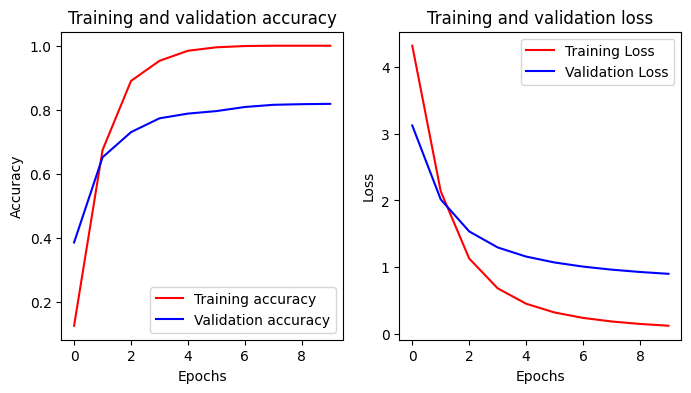

In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 [==============================] - 1s 796ms/step


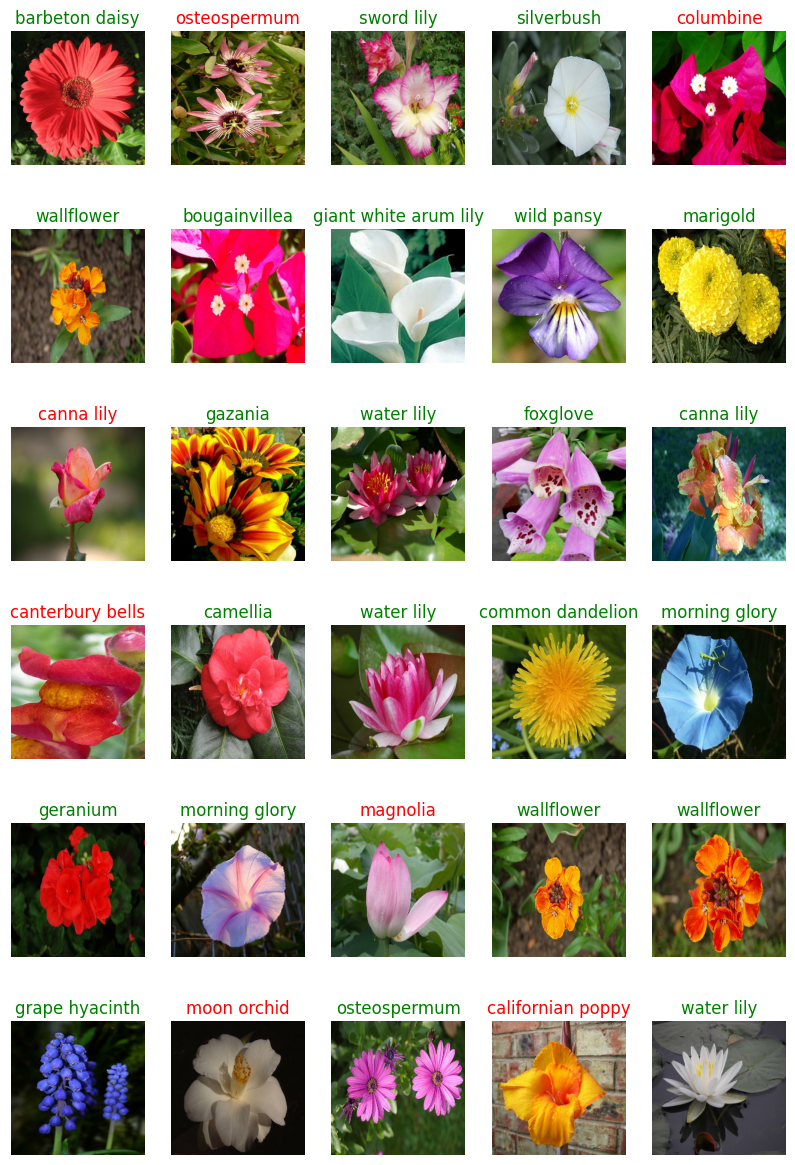

In [ ]:
for image_batch, label_batch in test_set.take(1):
    ps =  model.predict(image_batch)
    images =  image_batch.numpy().squeeze()
    labels = label_batch.numpy()

plt.figure(figsize=(10, 15))

for n in range(30):
    plt.subplot(6, 5, n+1)
    plt.imshow(images[n], cmap= plt.cm.binary)
    color = 'green' if np.argmax(ps[n]) == labels[n] else 'red'
    plt.title(class_names[str(np.argmax(ps[n]))], color=color)
    plt.axis('off')

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(test_set)
print('Test accuracy :', accuracy)


193/193 [==============================] - 171s 885ms/step - loss: 1.0191 - accuracy: 0.7728
Test accuracy : 0.7728086113929749


In [ ]:
print('Test accuracy :', round(accuracy, 3))
print('Test loss :', round(loss, 3))

Test accuracy : 0.773
Test loss : 1.019


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.
model_filepath = 'flower_classifier.h5'

model.save(model_filepath)


## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# TODO: Load the Keras model

try:
    flower_classifier = tf.keras.models.load_model(
        model_filepath,
        custom_objects={'KerasLayer': hub.KerasLayer}
    )
    print("Model loaded successfully!")
except ValueError as e:
    print(f"Error loading model: {e}")

Model loaded successfully!


In [ ]:
np.testing.assert_allclose(
    model.predict(test_set),
    flower_classifier.predict(test_set)
)

193/193 [==============================] - 174s 900ms/step


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like:

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function.

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values.

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# TODO: Create the process_image function

def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image /= 255.
    return image.numpy()


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size.

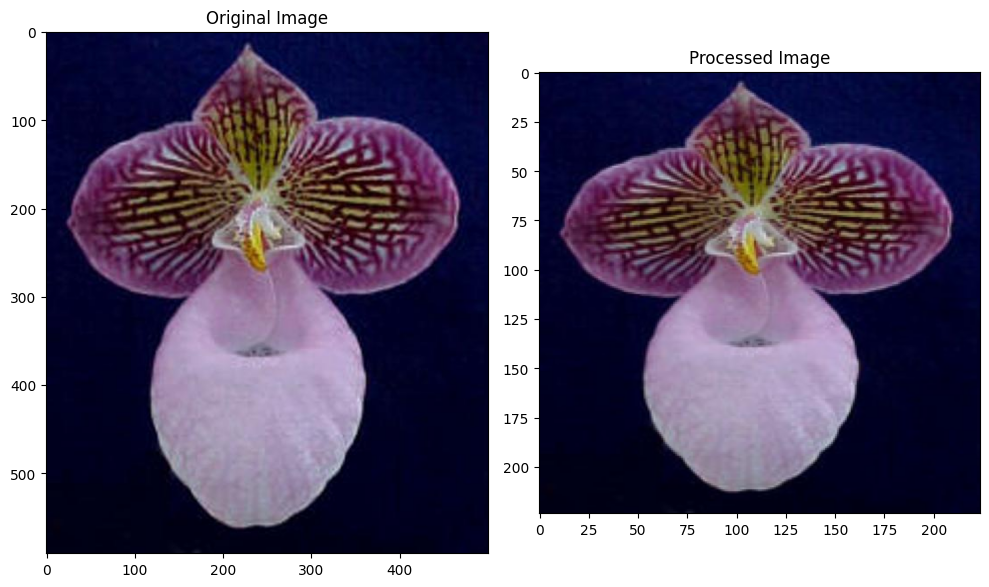

In [ ]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like:

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension.

In [ ]:
# TODO: Create the predict function

def predict(image_path, model, top_k):

    # Load the image using PIL
    im = Image.open(image_path)
    image = np.asarray(im)

    # Process the image
    processed_image = process_image(image)

    # Add batch dimension
    processed_image = np.expand_dims(processed_image, axis=0)

    # Get predictions from the model
    predictions = model.predict(processed_image)

    # Get the top K probabilities and class indices
    top_k_indices = np.argsort(predictions[0])[-top_k:][::-1]
    top_k_probs = predictions[0][top_k_indices]

    # Convert class indices to class names
    top_k_classes = [str(i) for i in top_k_indices]

    return top_k_probs, top_k_classes

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`.

1/1 [==============================] - 0s 30ms/step


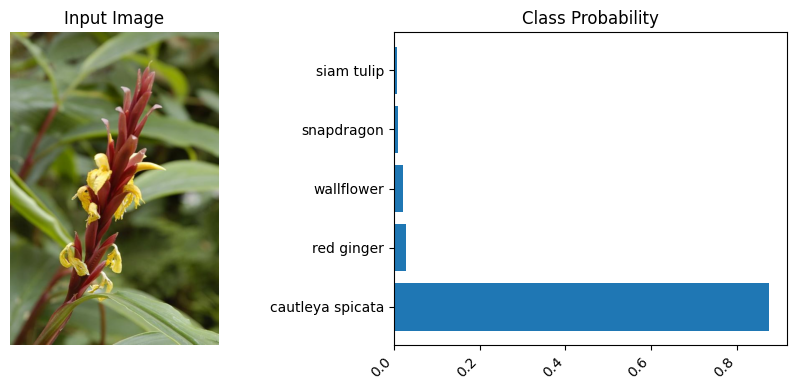

In [ ]:
# TODO: Plot the input image along with the top 5 classes

image_path = './test_images/cautleya_spicata.jpg'
probs, classes = predict(image_path, model, 5)

# Load and display the image
im = Image.open(image_path)
image = np.asarray(im)

# Convert class indices to class names
class_names_list = [class_names[c] for c in classes]

# Create the plot
plt.figure(figsize=(9, 4))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Input Image')
plt.axis('off')

x_pos = np.arange(len(class_names_list))

# Plot the bar graph of probabilities
plt.subplot(1, 2, 2)
plt.barh(x_pos, probs)
plt.yticks(x_pos, class_names_list)
plt.title('Class Probability')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()